In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors
import csv
import numpy as np


In [2]:
data = np.genfromtxt('sign_mnist_train.csv', delimiter = ',')
data = data[1:]
dimRepre = 28
ratio_train = 0.7
ratio_valid = 0.3
data

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]])

In [3]:
# y = np.zeros(data.shape[0])
# for i in range(len(data)):
#     y[i] = data[i][0]
y = data[:,0]
y

array([ 3.,  6.,  2., ..., 18., 17., 23.])

In [4]:
X = data[:,1:]
X

array([[107., 118., 127., ..., 204., 203., 202.],
       [155., 157., 156., ..., 103., 135., 149.],
       [187., 188., 188., ..., 195., 194., 195.],
       ...,
       [174., 174., 174., ..., 202., 200., 200.],
       [177., 181., 184., ...,  64.,  87.,  93.],
       [179., 180., 180., ..., 205., 209., 215.]])

In [5]:
dataTest = np.genfromtxt('sign_mnist_test.csv', delimiter = ',')
dataTest = dataTest[1:]
dataTest

array([[  6., 149., 149., ..., 112., 120., 107.],
       [  5., 126., 128., ..., 184., 182., 180.],
       [ 10.,  85.,  88., ..., 225., 224., 222.],
       ...,
       [  2., 190., 191., ..., 211., 209., 208.],
       [  4., 201., 205., ...,  67.,  70.,  63.],
       [  2., 173., 174., ..., 195., 193., 192.]])

In [6]:
yTest = dataTest[:,0]
yTest

array([ 6.,  5., 10., ...,  2.,  4.,  2.])

In [7]:
XTest = dataTest[:,1:]
XTest

array([[149., 149., 150., ..., 112., 120., 107.],
       [126., 128., 131., ..., 184., 182., 180.],
       [ 85.,  88.,  92., ..., 225., 224., 222.],
       ...,
       [190., 191., 190., ..., 211., 209., 208.],
       [201., 205., 208., ...,  67.,  70.,  63.],
       [173., 174., 173., ..., 195., 193., 192.]])

Text(0.5, 1.0, "Ceci est censé ressembler à la 14ème lettre de l'alphabet ;-)")

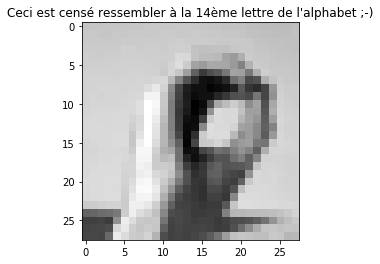

In [8]:
plt.figure()
n=567
plt.imshow(X[n].reshape(dimRepre, dimRepre), cm.gray)
plt.title("Ceci est censé ressembler à la "+str(int(y[n]))+ "ème lettre de l'alphabet ;-)")

In [9]:
def load_subSets(X, ratio_train, ratio_valid):
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain:Ntrain+Nvalid].copy()
    y_valid = y[Ntrain:Ntrain+Nvalid].copy()
    X_test  = XTest
    y_test  = yTest
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X, ratio_train, ratio_valid)

In [10]:
# Rendre la fonction au dessus, beaucoup plus général

In [11]:
varianceExplained=0.85
preProc = sklearn.decomposition.PCA(n_components = varianceExplained)
X_pp = preProc.fit(X)
X.shape

(27455, 784)

(0, 1)

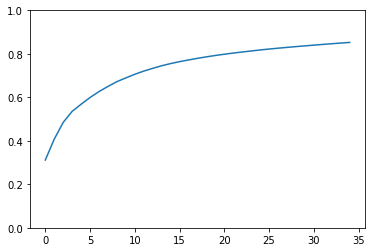

In [12]:
CumulativeExplainedVariance = np.cumsum(preProc.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance)
plt.ylim([0,1])

In [13]:
linear_training_score = []
linear_valid_score = []

nComp_range = np.array(list(np.arange(50,70)))
for nC in nComp_range:
    preProc = sklearn.decomposition.PCA(n_components = nC)
    preProc.fit(X)
    X_train_transformed = preProc.transform(X_train)
    X_valid_transformed = preProc.transform(X_valid)
    clf = sklearn.svm.SVC(kernel = "poly", coef0 = 1, degree = 2, max_iter = 100)    
    clf.fit(X_train_transformed, y_train)
    trainscore = clf.score(X_train_transformed, y_train)
    validscore = clf.score(X_valid_transformed, y_valid)
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    linear_training_score.append(trainscore)
    linear_valid_score.   append(validscore)

C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 50    training score: 0.9926631283172026 . valid score: 0.9940505099562894


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 51    training score: 0.9888125715475076 . valid score: 0.9876153472559495


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 52    training score: 0.9858466021438235 . valid score: 0.9851869839728024


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 53    training score: 0.9898532625663441 . valid score: 0.9882224380767363


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 54    training score: 0.9929233010719117 . valid score: 0.991500728508985


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 55    training score: 0.990477677177646 . valid score: 0.9894366197183099


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 56    training score: 0.9920907482568425 . valid score: 0.9934434191355027


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 57    training score: 0.9894890207097513 . valid score: 0.9885866925692084


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 58    training score: 0.9900093662191696 . valid score: 0.9877367654201068


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 59    training score: 0.9924549901134353 . valid score: 0.9929577464788732


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 60    training score: 0.9909980226870642 . valid score: 0.9907722195240408


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 61    training score: 0.9917785409511916 . valid score: 0.9911364740165128


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 62    training score: 0.9898532625663441 . valid score: 0.9884652744050509


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 63    training score: 0.9916744718493079 . valid score: 0.9908936376881982


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 64    training score: 0.9898012280154023 . valid score: 0.9879796017484216


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 65    training score: 0.9905817462795297 . valid score: 0.9908936376881982


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 66    training score: 0.9899052971172859 . valid score: 0.9900437105390967


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 67    training score: 0.9915704027474243 . valid score: 0.9921078193297718


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 68    training score: 0.9886564678946821 . valid score: 0.9884652744050509


C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


nombre Composants 69    training score: 0.989593089811635 . valid score: 0.9877367654201068


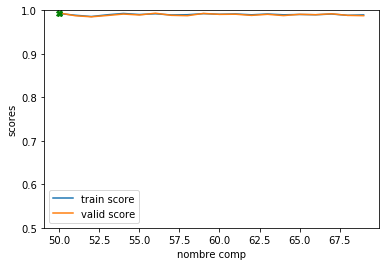

In [14]:
plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])
bestIndex = np.argmax(linear_valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')

In [15]:
num_folds = 10
kfold = sklearn.model_selection.KFold(n_splits=num_folds)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
monScoring = sklearn.model_selection.cross_val_score(estimator = , X = X, y = y, cv= kfold, scoring= 'neg_mean_squared_error')